In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regressions as reg
import numpy as np
sns.set_theme()
energy_table = pd.read_csv('../BDD/Spain/energy-spain.csv', sep=';')
gdp_table = pd.read_csv('../BDD/gdp-per-capita-maddison-2020.csv')
gdp_table = gdp_table[gdp_table.Code== 'ESP']
gdp_table.drop('Entity', axis=1, inplace=True)
gdp_table.drop('Code', axis=1, inplace=True)
gdp_table.drop('145446-annotations', axis=1, inplace=True)

pop_table = pd.read_csv('../BDD/population.csv', sep=';')
pop_table = pop_table[pop_table.Code=='ESP']

spain_table = pd.merge(gdp_table, pop_table, on=['Year'])
spain_table = pd.merge(spain_table, energy_table, on=['Year'])

year = spain_table['Year']
yplot = np.linspace(year.min(), year.max(), 200)
pop = spain_table['Total population (Gapminder, HYDE & UN)']
energy = spain_table['Energy (PetaJoules)']
gdpc = spain_table['GDP per capita']
gdp = gdpc*pop
spain_table

,Year,GDP per capita,Entity,Code,"Total population (Gapminder, HYDE & UN)",Energy (PetaJoules),Energy (TWh)
0,1850,1706.00,Spain,ESP,14846857,295.620000,67.176148
1,1851,1720.00,Spain,ESP,14931434,290.958000,66.116764
2,1852,1785.00,Spain,ESP,15014209,286.296000,65.057380
3,1853,1785.00,Spain,ESP,15095182,284.672000,64.688345
4,1854,1804.00,Spain,ESP,15174304,284.672000,64.688345
...,...,...,...,...,...,...,...
164,2014,30819.00,Spain,ESP,46778000,4767.827027,1538.591000
165,2015,31847.00,Spain,ESP,46672000,4831.281703,1559.068000
166,2016,30110.00,Spain,ESP,46634000,4876.320052,1573.602000
167,2017,30908.12,Spain,ESP,46647000,4940.072216,1594.175000


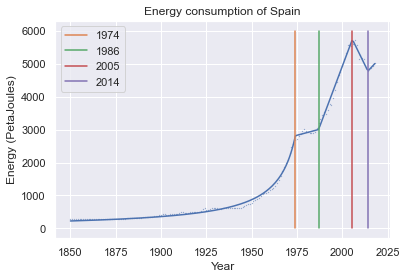

In [5]:
plt.scatter(year, energy, s=0.05)
r, y0 = reg.expReg(year, energy)
# plt.plot(yplot, reg.exp_fun(yplot, r=r, y0= y0))
#plt.plot(yplot, reg.hypllll(yplot, 2.99*10000, 1986, -10, 145, -140,75, 1976, 1986, 2006, 2014))

b,c,d,f,h,k,x1,x2, x3, x4 = reg.hypLLLL(year, energy, p0=(2.99*10000, 1986, -10, 145, -140,75, 1976, 1986, 2006, 2014))
plt.plot(yplot, reg.hypllll(yplot,b,c,d,f,h,k,x1,x2, x3, x4 ))
plt.plot([x1,x1],[0,6000], label=str(int(x1)))
plt.plot([x2,x2],[0,6000], label=str(int(x2)))
plt.plot([x3,x3],[0,6000], label=str(int(x3)))
plt.plot([x4,x4],[0,6000], label=str(int(x4)))
plt.legend()
plt.title('Energy consumption of Spain')
plt.xlabel('Year')
plt.ylabel('Energy (PetaJoules)')
ypred= reg.hypllll(year,b,c,d,f,h,k,x1,x2, x3, x4 )
spain_table['Energy(PJ)-Time(Year)'] = ypred

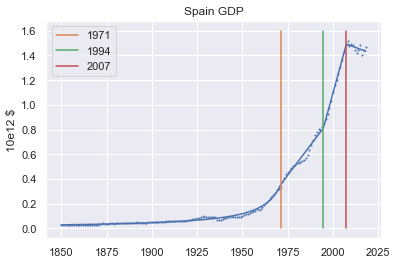

In [6]:
plt.scatter(year, gdp/10**12, s=1)
b,c,d,f,h,k,x1,x2, x3, x4 = 4.5,1986 , 0.01, 0.036, -0.01, 15, 1977, 1985, 2009, 2100
# plt.plot(yplot, reg.hypllll(yplot, b,c,d,f,h,k,x1,x2, x3, x4))
b,c,d,f,h,k,x1,x2, x3, x4 = reg.hypLLLL(year, gdp/10**12, p0 =(b,c,d,f,h,k,x1,x2, x3, x4), bounds=[-2, 2100] )
plt.plot(yplot, reg.hypllll(yplot, b,c,d,f,h,k,x1,x2, x3, x4))
plt.plot([x1,x1],[0,1.6], label=str(int(x1)))
plt.plot([x2,x2],[0,1.6], label=str(int(x2)))
plt.plot([x3,x3],[0,1.6], label=str(int(x3)))
plt.legend()
plt.title('Spain GDP')
plt.ylabel('10e12 $')
ypred = reg.hypllll(year, b,c,d,f,h,k,x1,x2, x3, x4)*(10**12)
spain_table['GDP(2011$)-Time(year)'] =ypred

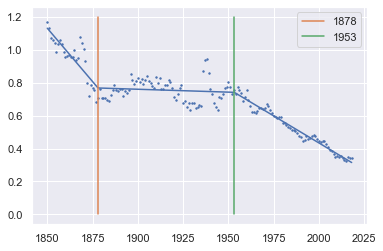

In [8]:
plt.scatter(year, energy/gdp*10**8, s= 2)
a,b, c, e, g, x1, x2, x3 = -0.007, 14, 0, -0.007,-1, 1888, 1950, 2100
a,b, c, e, g, x1, x2, x3 = reg.LLLL(year,energy/gdp*10**8, p0= (a,b, c, e, g, x1, x2, x3), bounds=[-15, 3000])
plt.plot(yplot, reg.llll(yplot, a,b, c, e, g, x1, x2, x3))
plt.plot([x1,x1],[0,1.2], label=str(int(x1)))
plt.plot([x2,x2],[0,1.2], label=str(int(x2)))
plt.legend()
ypred = reg.llll(year, a,b, c, e, g, x1, x2, x3)*(10**8)
spain_table['EI(PJ/$)-Time(year)'] = ypred

Text(0.5, 1.0, 'Variation in (%), Spain')

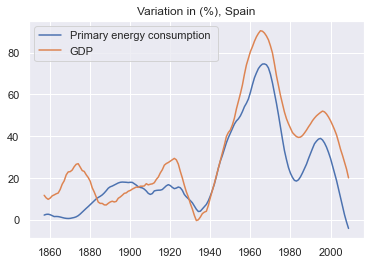

In [7]:
from derivee import growth_rate
x, y=growth_rate(year, energy, s=10, a =15 )
x1,y1 = growth_rate(year, gdp, s=10, a=15)
plt.plot(x,y, label = "Primary energy consumption ")
plt.plot(x1, y1, label = "GDP" )
plt.legend()
plt.title("Variation in (%), Spain")


In [10]:
spain_table =spain_table.rename(columns={'Energy (PetaJoules)':'Primary energy (PJ)', 'Energy (TWh)':'Primary energy (TWh)','Total population (Gapminder, HYDE & UN)' : 'Population' })


In [12]:
spain_table.to_csv('../BDD/ESP.csv', index=False)

In [11]:
spain_table

,Year,GDP per capita,Entity,Code,Population,Primary energy (PJ),Primary energy (TWh),Energy(PJ)-Time(Year),GDP(2011$)-Time(year),EI(PJ/$)-Time(year)
0,1850,1706.00,Spain,ESP,14846857,295.620000,67.176148,225.891772,2.874578e+10,1.130426e+08
1,1851,1720.00,Spain,ESP,14931434,290.958000,66.116764,227.577682,2.896562e+10,1.117466e+08
2,1852,1785.00,Spain,ESP,15014209,286.296000,65.057380,229.288946,2.918885e+10,1.104505e+08
3,1853,1785.00,Spain,ESP,15095182,284.672000,64.688345,231.026141,2.941555e+10,1.091545e+08
4,1854,1804.00,Spain,ESP,15174304,284.672000,64.688345,232.789861,2.964580e+10,1.078585e+08
...,...,...,...,...,...,...,...,...,...,...
164,2014,30819.00,Spain,ESP,46778000,4767.827027,1538.591000,4795.849248,1.456087e+12,3.413242e+07
165,2015,31847.00,Spain,ESP,46672000,4831.281703,1559.068000,4824.747221,1.450493e+12,3.347465e+07
166,2016,30110.00,Spain,ESP,46634000,4876.320052,1573.602000,4884.265758,1.444900e+12,3.281689e+07
167,2017,30908.12,Spain,ESP,46647000,4940.072216,1594.175000,4943.784296,1.439306e+12,3.215912e+07
